<a href="https://colab.research.google.com/github/ALRIER/DtaScienceAssignments_WaterlooUniversity/blob/Assignments/Intro2DataScienceI/Intro2DataSC_ASSIG4_MachineL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [3]:
NAME = "Alvaro Rivera"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [4]:
# Here are all imports that you will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import pandas_profiling
from scipy.stats import chi2_contingency
from matplotlib import style
from scipy import stats
from pandas_profiling import ProfileReport
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')   
drive.mount('/content/drive')

Mounted at /content/drive


<h2>Load the data from the file (iris.data) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.</h2>

In [5]:
from google.colab import files
files.upload()

Saving iris.data to iris.data


{'iris.data': b'5.1,3.5,1.4,0.2,Iris-setosa\n4.9,3.0,1.4,0.2,Iris-setosa\n4.7,3.2,1.3,0.2,Iris-setosa\n4.6,3.1,1.5,0.2,Iris-setosa\n5.0,3.6,1.4,0.2,Iris-setosa\n5.4,3.9,1.7,0.4,Iris-setosa\n4.6,3.4,1.4,0.3,Iris-setosa\n5.0,3.4,1.5,0.2,Iris-setosa\n4.4,2.9,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0.1,Iris-setosa\n5.4,3.7,1.5,0.2,Iris-setosa\n4.8,3.4,1.6,0.2,Iris-setosa\n4.8,3.0,1.4,0.1,Iris-setosa\n4.3,3.0,1.1,0.1,Iris-setosa\n5.8,4.0,1.2,0.2,Iris-setosa\n5.7,4.4,1.5,0.4,Iris-setosa\n5.4,3.9,1.3,0.4,Iris-setosa\n5.1,3.5,1.4,0.3,Iris-setosa\n5.7,3.8,1.7,0.3,Iris-setosa\n5.1,3.8,1.5,0.3,Iris-setosa\n5.4,3.4,1.7,0.2,Iris-setosa\n5.1,3.7,1.5,0.4,Iris-setosa\n4.6,3.6,1.0,0.2,Iris-setosa\n5.1,3.3,1.7,0.5,Iris-setosa\n4.8,3.4,1.9,0.2,Iris-setosa\n5.0,3.0,1.6,0.2,Iris-setosa\n5.0,3.4,1.6,0.4,Iris-setosa\n5.2,3.5,1.5,0.2,Iris-setosa\n5.2,3.4,1.4,0.2,Iris-setosa\n4.7,3.2,1.6,0.2,Iris-setosa\n4.8,3.1,1.6,0.2,Iris-setosa\n5.4,3.4,1.5,0.4,Iris-setosa\n5.2,4.1,1.5,0.1,Iris-setosa\n5.5,4.2,1.4,0.2,Iris-setosa

In [6]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.

In [7]:
df_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [9]:
df = pd.concat([df_target, df_data], axis=1)
df.head()

,target,sepal_length,sepal_width,petal_length,petal_width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<h2>Data inspection.</h2>

<h2>Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.

<h2>Prepare 2 scatter plots - sepal_width vs sepal_length and petal_width vs petal_length. Scatter plots should show each class in different color (seaborn.lmplot is recommended for plotting).</h2>

In [11]:
#Now I will decribe the data to understad it and know how it behaves. 
df.describe()

,target,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,0.000000,5.100000,2.800000,1.600000,0.300000
50%,1.000000,5.800000,3.000000,4.350000,1.300000
75%,2.000000,6.400000,3.300000,5.100000,1.800000
max,2.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='target'>

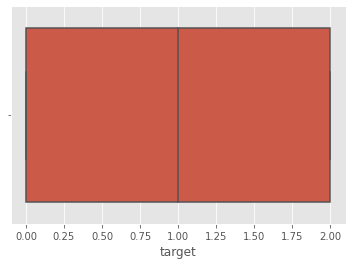

In [12]:
#Now I am checking the balance of the data, i need to verity that the balance is good. 
sns.boxplot(x=df["target"])

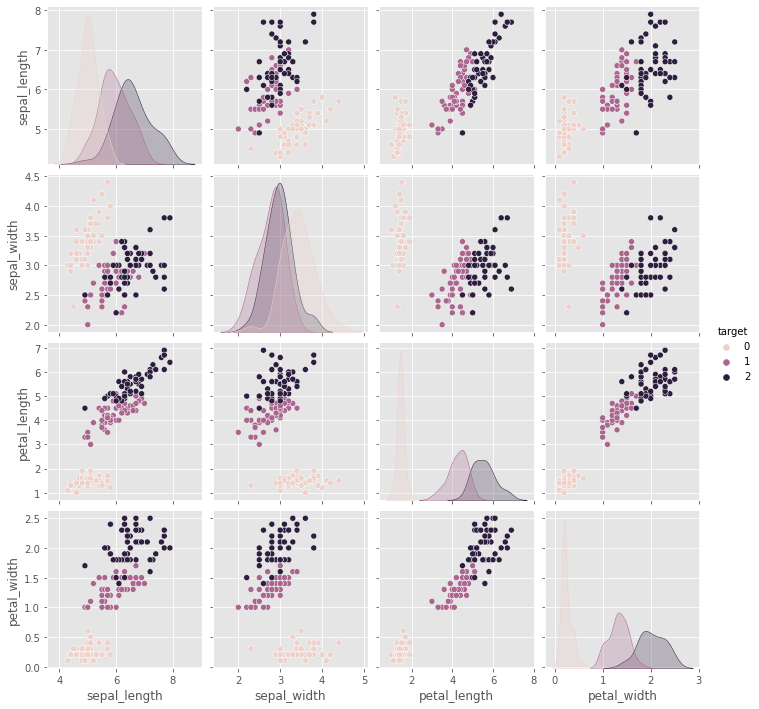

In [13]:
#I will take a look of the data to understad all the correlations husing like a cretetia of comparison the variable "target"
sns.pairplot(data=df, hue="target")

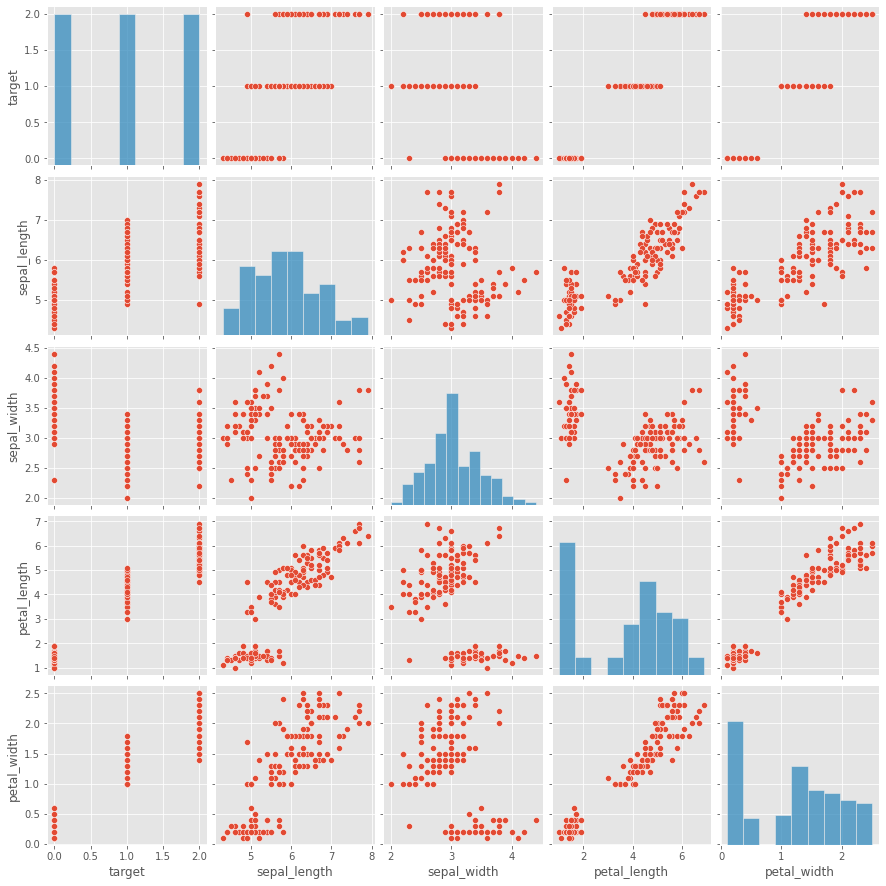

In [14]:
sns.pairplot(data=df)

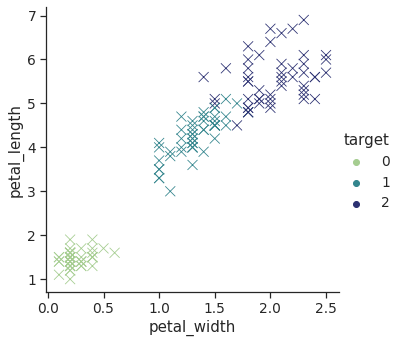

In [15]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=df,
    x="petal_width", y="petal_length", hue="target",
    palette="crest", marker="x", s=100,
)

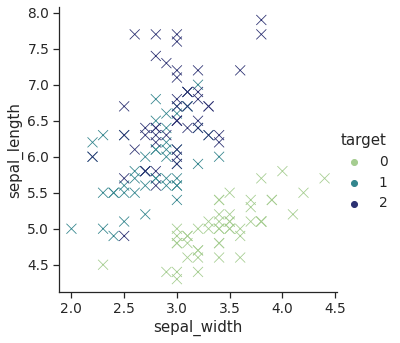

In [16]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=df, 
    x="sepal_width", y="sepal_length", hue="target",
    palette="crest", marker="x", s=100,
)


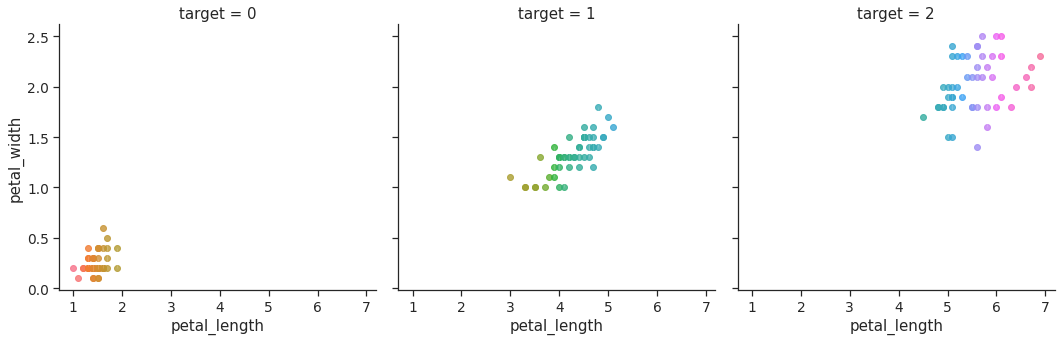

In [17]:
df1=pd.DataFrame(df, columns=['petal_length','petal_width','target'])
sns.set_theme(style="ticks", font_scale=1.25)
g=sns.lmplot(data=df1, x="petal_length",
           y="petal_width", hue='petal_length',
           col="target", legend=None
)

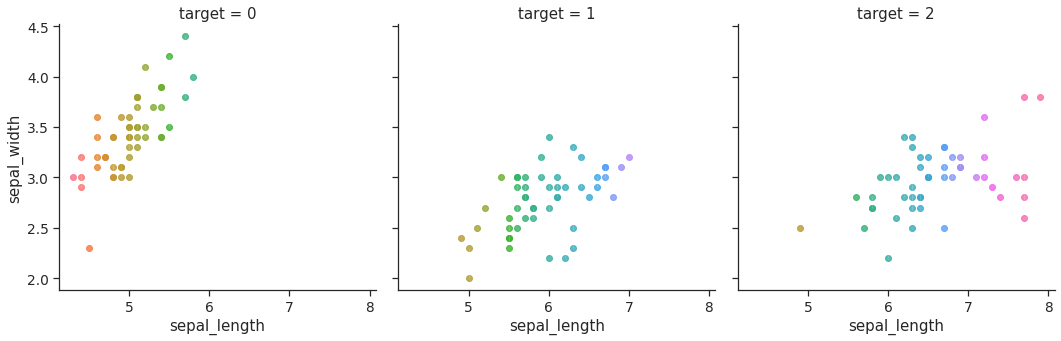

In [18]:
df2=pd.DataFrame(df, columns=['sepal_length','sepal_width','target'])
sns.set_theme(style="ticks", font_scale=1.25)
g=sns.lmplot(data=df2, x="sepal_length",
           y="sepal_width", hue='sepal_length',
           col="target",legend=None
)

<h2>Prepare the data for classification.</h2>

<h2>Using the pandas operators prepare the feature variables X and the response Y for the fit. Note that sklean expects data as arrays, so convert extracted columns into arrays.</h2>

In [19]:
X = df[['sepal_length',	'sepal_width'	,'petal_length'	,'petal_width']]
y = df["target"]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


<h2>Split the data into train and test using sklearn train_test_split function.</h2>

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


<h2>Run the fit using KNeighborsClassifier from sklearn.neighbors.</h2>

<h2>First, instantiate the model,
Then, run the classifier on the training set.</h2>

In [21]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
118,7.7,2.6,6.9,2.3
57,4.9,2.4,3.3,1.0
56,6.3,3.3,4.7,1.6
48,5.3,3.7,1.5,0.2
...,...,...,...,...
4,5.0,3.6,1.4,0.2
3,4.6,3.1,1.5,0.2
111,6.4,2.7,5.3,1.9
140,6.7,3.1,5.6,2.4


In [22]:
display(X_train.describe())
print()
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.888333,3.058333,3.841667,1.235833
std,0.844974,0.432811,1.768995,0.759234
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.425000,3.325000,5.125000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,5.663333,3.053333,3.423333,1.053333
std,0.742541,0.455414,1.739339,0.769565
min,4.600000,2.300000,1.000000,0.100000
25%,5.100000,2.700000,1.500000,0.200000
50%,5.650000,3.000000,3.900000,1.100000
75%,6.250000,3.275000,4.900000,1.800000
max,7.600000,4.100000,6.600000,2.500000


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
-0.017241379310344834 1.0


<h2>Use learning model to predict the class from features, run prediction on X from test part.</h2>

<h2>Show the accuracy score of the prediction by comparing predicted iris classes and the Y values from the test.</h2>

<h2>Comparing these two arrays (predicted classes and test Y), count the numbers of correct predictions and predictions that were wrong. (HINTS: NumPy arrays can be compared using == operator. You can also use NumPy's operator count_nonzero to count number of non-False values).</h2>

In [24]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 843 µs, sys: 1.97 ms, total: 2.81 ms
Wall time: 8.87 ms


KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 2])

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9333333333333333


<Figure size 2000x1500 with 0 Axes>

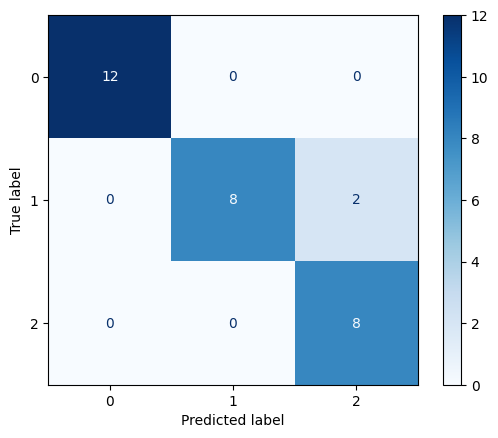

In [27]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn_clf, X_test_scaled, y_test, values_format="", cmap="Blues")

<h2>In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors k. We will use the following number of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50:</h2>

<h2>-Generate 10 random train/test splits for each value of k</h2>

<h2>-Fit the model for each split and generate predictions</h2>

<h2>-Average the accuracy score for each k</h2>

<h2>-Calculate the average number of correct predictions for each k as well</h2>

<h2>-Plot the accuracy score for different values of k. What conclusion can you make based on the graph?</h2>

I am not sure if it is what you expected me to do... I took each split of the data and changed the "random state" value, and in each case, I set the state as the number of k you gave me (1,3,5,7,10,20,30,40, and 50). I did the same with the "n_neighbors" parameter. and finally, I ran the prediction to see how it changed between each combination. 

<h2>K=1

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [29]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [30]:
display(X_train.describe())
print()
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.838333,3.019167,3.810000,1.219167
std,0.832752,0.420343,1.772071,0.776687
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.125000,1.800000
max,7.700000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,5.863333,3.210000,3.550000,1.120000
std,0.822730,0.470033,1.751994,0.708276
min,4.400000,2.500000,1.200000,0.200000
25%,5.400000,2.925000,1.525000,0.400000
50%,5.650000,3.200000,4.300000,1.250000
75%,6.375000,3.475000,4.700000,1.575000
max,7.900000,4.200000,6.400000,2.300000


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.02941176470588247 1.0588235294117647


In [32]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 907 µs, sys: 0 ns, total: 907 µs
Wall time: 918 µs


KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


<Figure size 2000x1500 with 0 Axes>

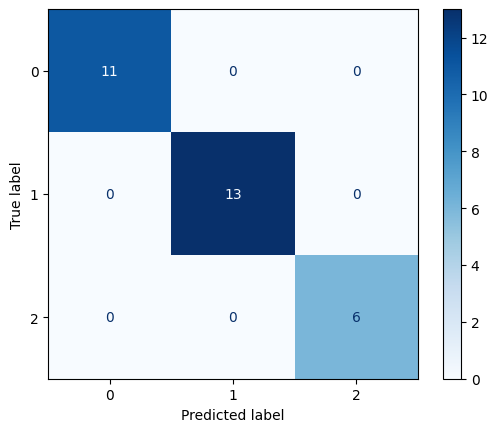

In [35]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn_clf, X_test_scaled, y_test, values_format="", cmap="Blues")

<h2>K = 5

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [37]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [38]:
display(X_train.describe())
print()
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.838333,3.073333,3.690000,1.171667
std,0.841186,0.459216,1.781766,0.769392
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.500000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,5.863333,2.993333,4.030000,1.310000
std,0.786736,0.324763,1.699523,0.735011
min,4.400000,2.400000,1.300000,0.100000
25%,5.150000,2.800000,2.100000,0.625000
50%,5.850000,2.950000,4.500000,1.400000
75%,6.300000,3.150000,5.325000,1.800000
max,7.400000,3.700000,6.300000,2.500000


In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.0


In [40]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 1.78 ms, sys: 998 µs, total: 2.78 ms
Wall time: 2.64 ms


KNeighborsClassifier()

In [41]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9


<Figure size 2000x1500 with 0 Axes>

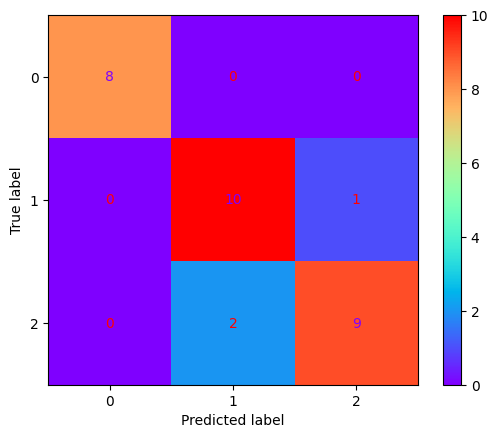

In [43]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn_clf, X_test_scaled, y_test, values_format="", cmap='rainbow')

<h2>K =7

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [45]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
79,5.7,2.6,3.5,1.0
22,4.6,3.6,1.0,0.2
139,6.9,3.1,5.4,2.1
74,6.4,2.9,4.3,1.3
...,...,...,...,...
142,5.8,2.7,5.1,1.9
92,5.8,2.6,4.0,1.2
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0


In [46]:
display(X_train.describe())
print()
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.833333,3.059167,3.675000,1.166667
std,0.849848,0.436274,1.804628,0.774741
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.150000,1.300000
75%,6.400000,3.300000,5.100000,1.825000
max,7.900000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.00000
mean,5.883333,3.050000,4.090000,1.33000
std,0.746525,0.441588,1.582741,0.70718
min,4.500000,2.200000,1.300000,0.10000
25%,5.250000,2.750000,3.825000,1.12500
50%,5.900000,3.000000,4.500000,1.50000
75%,6.400000,3.350000,5.075000,1.80000
max,7.200000,4.100000,6.100000,2.50000


In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.0


In [48]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 1.93 ms, sys: 0 ns, total: 1.93 ms
Wall time: 2.17 ms


KNeighborsClassifier(n_neighbors=7)

In [49]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9


<Figure size 2000x1500 with 0 Axes>

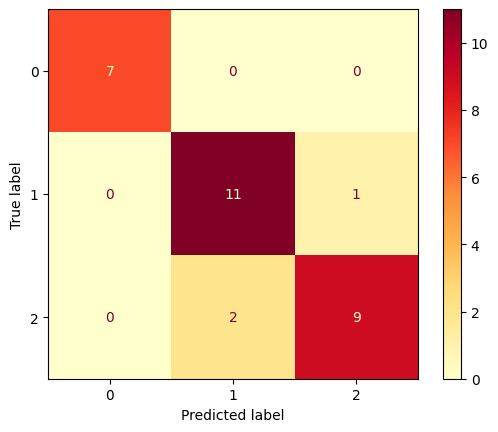

In [51]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn_clf, X_test_scaled, y_test, values_format="", cmap='YlOrRd')

<h2>K= 10

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [53]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
58,6.6,2.9,4.6,1.3
97,6.2,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
114,5.8,2.8,5.1,2.4
146,6.3,2.5,5.0,1.9
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [54]:
display(X_train.describe())
print()
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.870000,3.072500,3.780833,1.218333
std,0.841527,0.434241,1.785859,0.775137
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.500000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,5.736667,2.996667,3.666667,1.123333
std,0.776146,0.444494,1.706849,0.715678
min,4.400000,2.000000,1.200000,0.200000
25%,5.100000,2.725000,1.500000,0.225000
50%,5.700000,3.000000,4.300000,1.300000
75%,6.275000,3.275000,4.800000,1.575000
max,7.700000,3.800000,6.700000,2.200000


In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
-0.09090909090909094 0.9661016949152543


In [56]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 2.54 ms, sys: 32 µs, total: 2.57 ms
Wall time: 2.59 ms


KNeighborsClassifier(n_neighbors=10)

In [57]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [58]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


<Figure size 2000x1500 with 0 Axes>

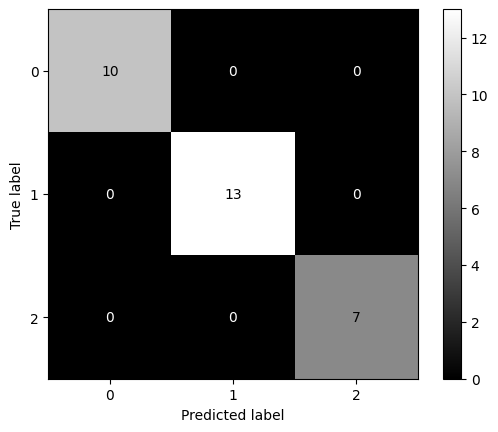

In [59]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn_clf, X_test_scaled, y_test, values_format="", cmap='binary_r')

<h2>K= 20

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [61]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
88,5.6,3.0,4.1,1.3
0,5.1,3.5,1.4,0.2
46,5.1,3.8,1.6,0.2
11,4.8,3.4,1.6,0.2
...,...,...,...,...
22,4.6,3.6,1.0,0.2
75,6.6,3.0,4.4,1.4
137,6.4,3.1,5.5,1.8
15,5.7,4.4,1.5,0.4


In [62]:
display(X_train.describe())
print()
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.828333,3.100000,3.713333,1.198333
std,0.824640,0.447777,1.777730,0.776220
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.700000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,5.903333,2.886667,3.936667,1.203333
std,0.853182,0.340115,1.732545,0.716064
min,4.300000,2.200000,1.100000,0.100000
25%,5.125000,2.700000,2.025000,0.550000
50%,5.950000,2.900000,4.650000,1.300000
75%,6.500000,3.075000,5.100000,1.750000
max,7.700000,3.700000,6.700000,2.400000


In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
-0.028571428571428692 0.9661016949152543


In [64]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 2.23 ms, sys: 13 µs, total: 2.24 ms
Wall time: 1.89 ms


KNeighborsClassifier(n_neighbors=20)

In [65]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9333333333333333


<Figure size 2000x1500 with 0 Axes>

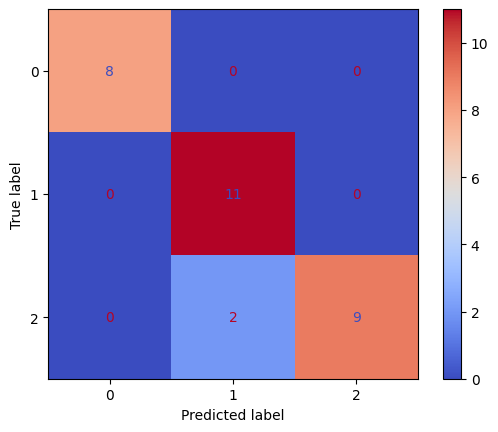

In [67]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn_clf, X_test_scaled, y_test, values_format="", cmap="coolwarm")

<h2>K= 30

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [69]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
139,6.9,3.1,5.4,2.1
81,5.5,2.4,3.7,1.0
112,6.8,3.0,5.5,2.1
127,6.1,3.0,4.9,1.8
118,7.7,2.6,6.9,2.3
...,...,...,...,...
53,5.5,2.3,4.0,1.3
130,7.4,2.8,6.1,1.9
140,6.7,3.1,5.6,2.4
45,4.8,3.0,1.4,0.3


In [70]:
display(X_train.describe())
print()
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.884167,3.070833,3.819167,1.231667
std,0.820022,0.441996,1.751268,0.755594
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.375000
50%,5.800000,3.000000,4.450000,1.400000
75%,6.500000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,5.680000,3.003333,3.513333,1.070000
std,0.853956,0.413132,1.829968,0.787904
min,4.400000,2.300000,1.200000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.750000,2.950000,4.000000,1.250000
75%,6.300000,3.200000,5.050000,1.800000
max,7.600000,4.100000,6.600000,2.400000


In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 0.9583333333333334


In [72]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=30)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 1.02 ms, sys: 1 µs, total: 1.02 ms
Wall time: 855 µs


KNeighborsClassifier(n_neighbors=30)

In [73]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 1])

In [74]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9666666666666667


<Figure size 2000x1500 with 0 Axes>

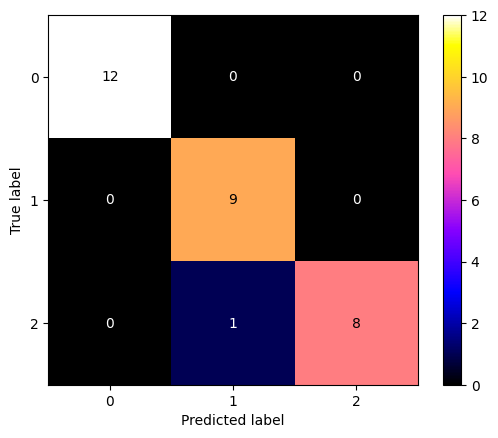

In [75]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn_clf, X_test_scaled, y_test, values_format="", cmap='gnuplot2')

<h2>K=40

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [77]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [78]:
display(X_train.describe())
print()
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.00000
mean,5.851667,3.074167,3.720000,1.17750
std,0.830610,0.441445,1.780973,0.76229
min,4.400000,2.000000,1.000000,0.10000
25%,5.100000,2.800000,1.500000,0.30000
50%,5.800000,3.000000,4.350000,1.30000
75%,6.400000,3.325000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,5.810000,2.990000,3.910000,1.286667
std,0.831015,0.413021,1.722138,0.768668
min,4.300000,2.200000,1.100000,0.100000
25%,5.250000,2.700000,2.150000,0.475000
50%,5.600000,3.000000,4.300000,1.350000
75%,6.375000,3.300000,5.200000,1.800000
max,7.700000,3.800000,6.700000,2.500000


In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
-0.028571428571428692 1.0


In [80]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=40)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 1.41 ms, sys: 28 µs, total: 1.44 ms
Wall time: 1.23 ms


KNeighborsClassifier(n_neighbors=40)

In [81]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9666666666666667


<Figure size 2000x1500 with 0 Axes>

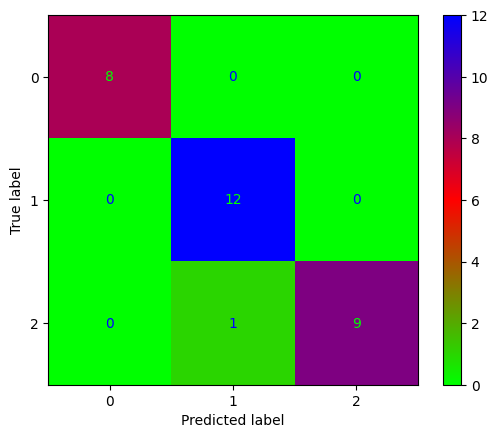

In [83]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn_clf, X_test_scaled, y_test, values_format="", cmap='brg_r')

<h2>K=50

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [85]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4
...,...,...,...,...
70,5.9,3.2,4.8,1.8
132,6.4,2.8,5.6,2.2
33,5.5,4.2,1.4,0.2
109,7.2,3.6,6.1,2.5


In [86]:
display(X_train.describe())
print()
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.790833,3.061667,3.708333,1.180833
std,0.825741,0.434864,1.759946,0.759068
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,6.053333,3.040000,3.956667,1.273333
std,0.817369,0.446905,1.802811,0.783420
min,4.800000,2.200000,1.200000,0.100000
25%,5.425000,2.800000,1.700000,0.425000
50%,6.000000,3.000000,4.500000,1.400000
75%,6.650000,3.300000,5.150000,1.975000
max,7.900000,4.000000,6.900000,2.500000


In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.0588235294117647


In [88]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=50)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 1.05 ms, sys: 2 µs, total: 1.05 ms
Wall time: 1.03 ms


KNeighborsClassifier(n_neighbors=50)

In [89]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 2, 2, 2, 1, 1, 2])

In [90]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
accuracy=accuracy_score(y_test, y_pred)

0.9


<Figure size 2000x1500 with 0 Axes>

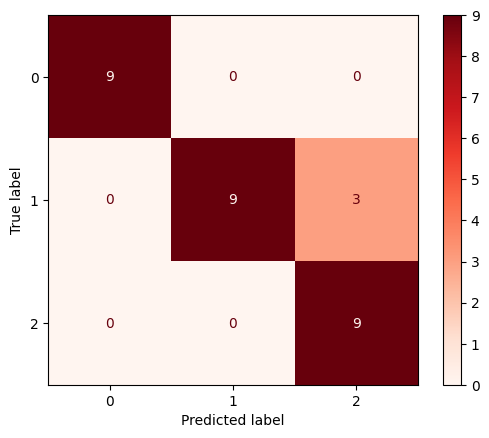

In [91]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn_clf, X_test_scaled, y_test, values_format="", cmap="Reds")

Finally, I created a group of K values and made the prediction for each value. I took the accuracy score testing and compare it for each case of the K value.

I would say that the model adjusts perfectly for the 3 first k (1,3, and 5), but after these 3 levels of K the model is a little bit less sensitive and makes some mistakes; however, I consider that it is normal because K =7 and more are big numbers already and its difficult to fit a K.

In [95]:
x = np.array(df.iloc[:, 0:4])
y = np.array(df['target'])

In [96]:
num_splits = 10
k_vals = [1, 3, 5, 7, 10, 20, 30, 40, 50]
accuracies = []
comparisons = []

for k in k_vals:
    acc_samples = []
    comp_samples = []
    for i in range(num_splits):
        # make sure we don't set the `random_state` parameter to an integer, we want random splits
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc_samples.append(accuracy_score(y_test, y_pred))
        comp_samples.append(np.count_nonzero(y_test == y_pred))
    accuracies.append(np.mean(acc_samples))
    comparisons.append(np.mean(comp_samples))

compare_df = pd.DataFrame({'Correct Predictions':comparisons,'Accuracy Score':accuracies}, index=[k_vals])
compare_df


,Correct Predictions,Accuracy Score
1,45.0,1.000000
3,45.0,1.000000
5,45.0,1.000000
7,45.0,1.000000
10,44.8,0.995556
20,44.6,0.991111
30,44.9,0.997778
40,44.5,0.988889
50,41.9,0.931111


Text(0, 0.5, 'Accuracy')

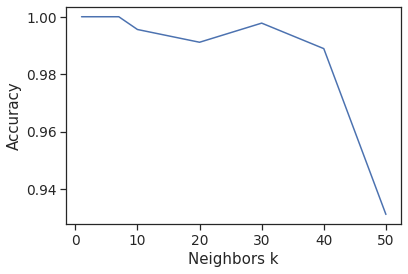

In [98]:
plt.plot(k_vals,compare_df['Accuracy Score'])
plt.xlabel('Neighbors k')
plt.ylabel('Accuracy')